In [254]:
import glob, random, tabulate
from typing import List, Tuple
import os
import matplotlib.pyplot as plt
from PIL import Image

In [255]:
folder = r"C:\Users\user\Documents\George\CPP_Projects\Procedural_Implicit_Terrain_Raymarching\Images\Eval\Screenshots\Sky" + "\\"

headers = ["A", "B", "List Order", "Pair Order"]

def remove_prefix_and_suffix(filename : str):
    filename = filename.removeprefix(folder)
    return filename[:filename.find('_')]

def print_data(data: List[List[any]]):
    num_col = len(data[0])
    data = [[remove_prefix_and_suffix(item) if isinstance(item, str) else item for item in row ] for row in data]
    print(tabulate.tabulate(data, headers=headers[:num_col]))


In [256]:
image_files = sorted(glob.glob(folder + "*.png"))
# for i, image_file in enumerate(image_files):
    # print(remove_prefix_and_suffix(image_file))

pairs = [list(pair) for pair in list(zip(image_files[::2], image_files[1::2], range(0, len(image_files)//2)))]

print_data(pairs)

A      B        List Order
-----  -----  ------------
S1-F   S1-T              0
S1H-F  S1H-T             1
S2-F   S2-T              2
S2H-F  S2H-T             3
S3-F   S3-T              4
S3H-F  S3H-T             5
S4-F   S4-T              6
S4H-F  S4H-T             7
S5-F   S5-T              8
S5H-F  S5H-T             9


In [257]:
seed_value = 42  # Choose any seed value

random.seed(seed_value)

random.shuffle(pairs)

print_data(pairs)

A      B        List Order
-----  -----  ------------
S4H-F  S4H-T             7
S2H-F  S2H-T             3
S2-F   S2-T              2
S5-F   S5-T              8
S3H-F  S3H-T             5
S4-F   S4-T              6
S5H-F  S5H-T             9
S3-F   S3-T              4
S1-F   S1-T              0
S1H-F  S1H-T             1


In [258]:
for pair in pairs:
    order = random.choice([0, 1])
    pair.append(order)
    if order == 1:
        pair[0], pair[1] = pair[1], pair[0]

print_data(pairs)

A      B        List Order    Pair Order
-----  -----  ------------  ------------
S4H-T  S4H-F             7             1
S2H-F  S2H-T             3             0
S2-F   S2-T              2             0
S5-F   S5-T              8             0
S3H-F  S3H-T             5             0
S4-F   S4-T              6             0
S5H-F  S5H-T             9             0
S3-F   S3-T              4             0
S1-T   S1-F              0             1
S1H-F  S1H-T             1             0


In [259]:
def display_and_save_images(list_of_lists, save_folder):
    # Ensure the save directory exists
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)

    # Iterate over each pair of image paths in the list of lists
    for index, row in enumerate(list_of_lists, start=1):
        # Load the images
        img1 = Image.open(row[0])
        img2 = Image.open(row[1])

        # Create a matplotlib figure
        fig, axs = plt.subplots(1, 2, figsize=(14, 5), facecolor='w', edgecolor='w')
        # fig.suptitle(f"Q{index}")  # Set title for the entire figure

        # Display the first image
        axs[0].imshow(img1)
        axs[0].set_title("Render A", color='black')
        axs[0].axis('off')  # Turn off axis

        # Display the second image
        axs[1].imshow(img2)
        axs[1].set_title("Render B", color='black')
        axs[1].axis('off')  # Turn off axis
        fig.subplots_adjust(wspace=0.01)  # Set the space between the images


        # Save the figure to the specified folder
        plt.savefig(os.path.join(save_folder, f"combined_image_{index}.png"), bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor=fig.get_edgecolor())
        plt.show()  # Display the figure in the notebook

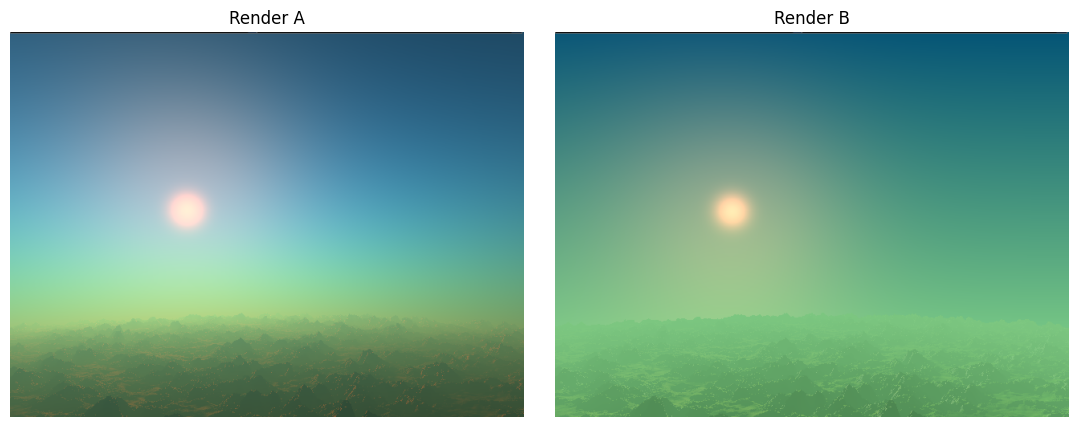

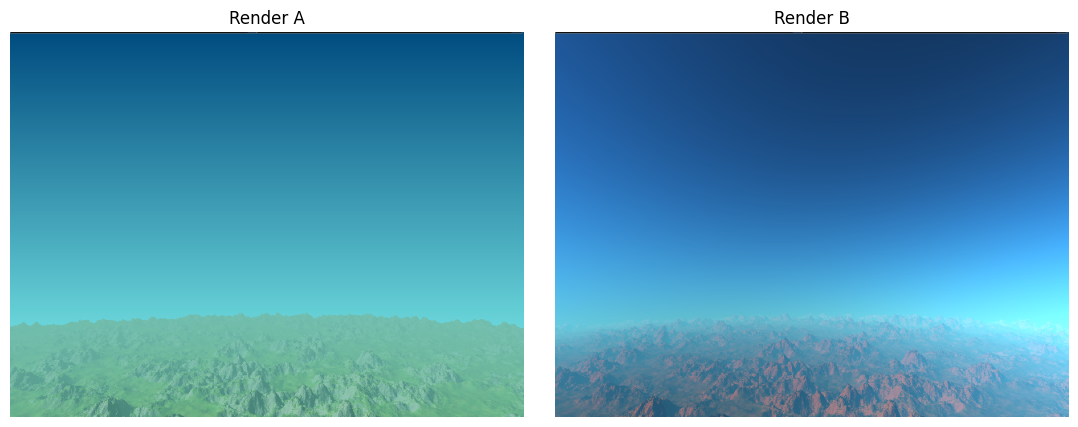

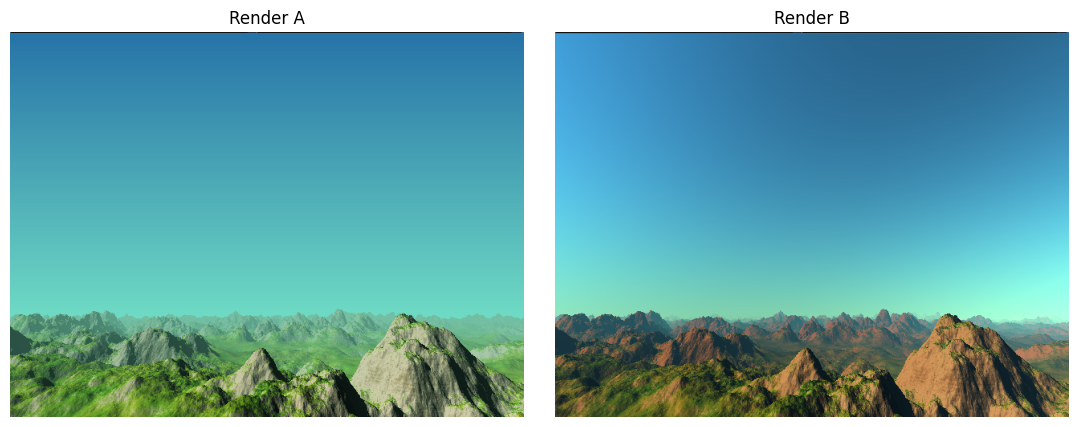

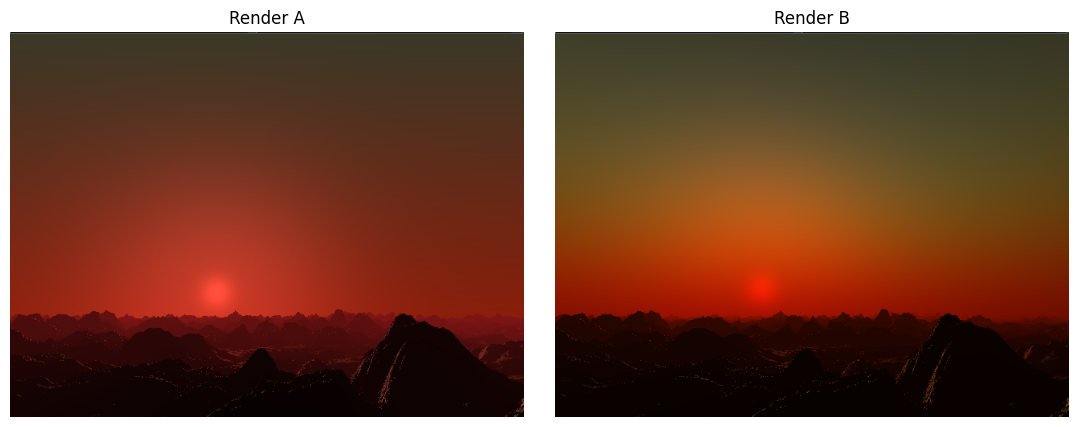

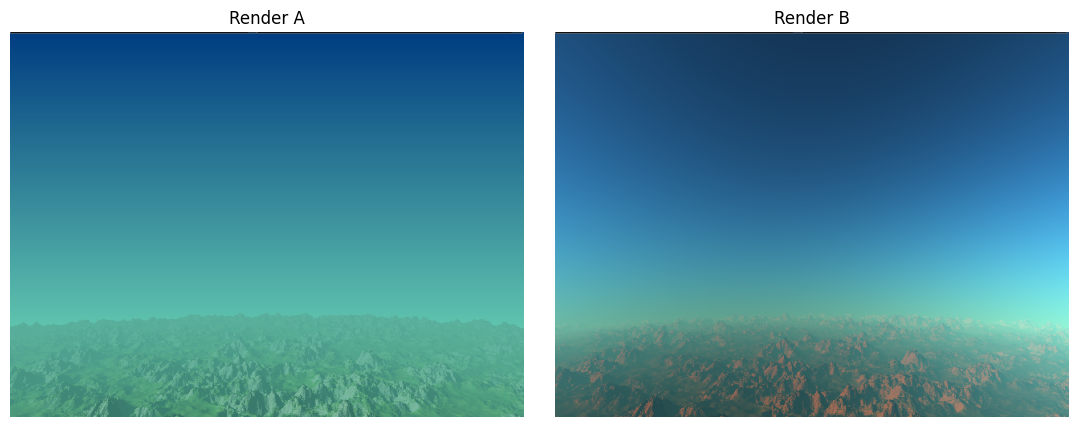

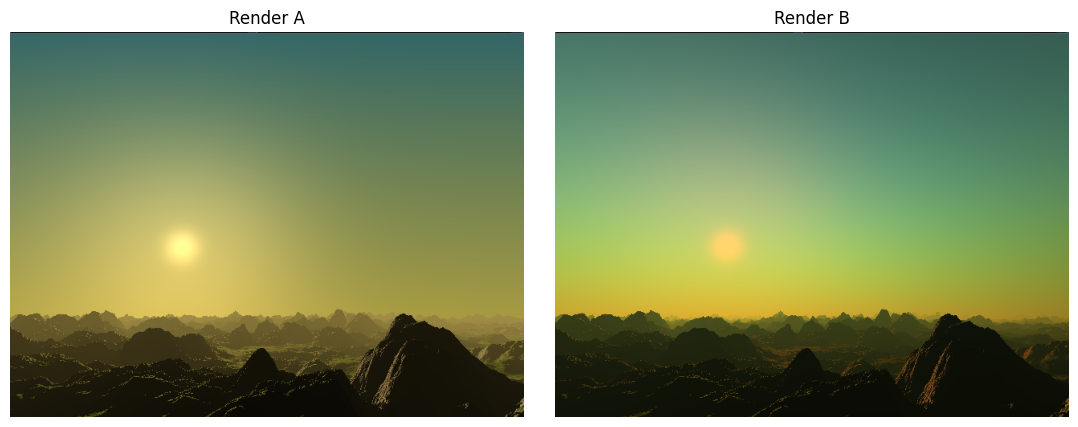

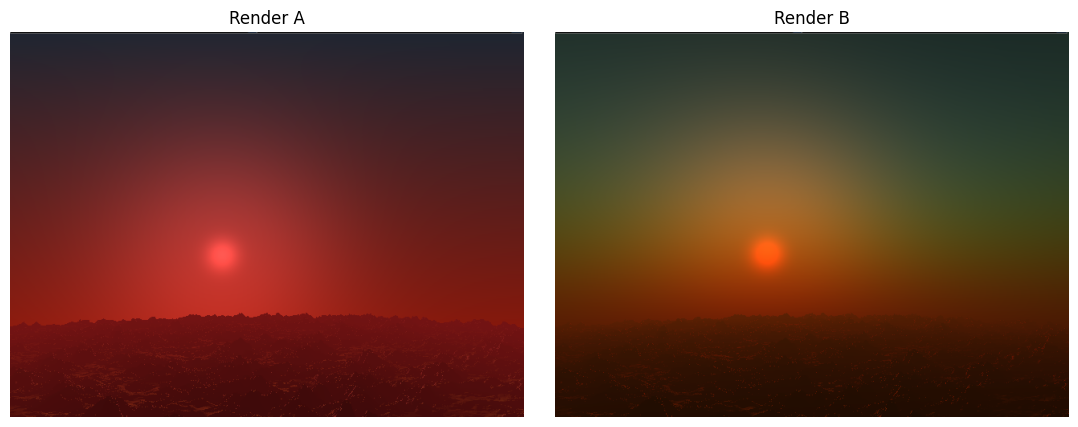

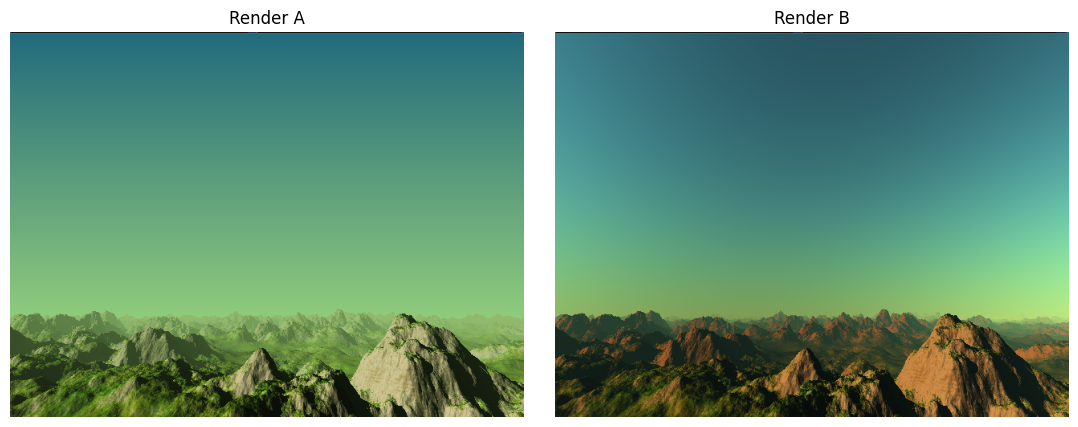

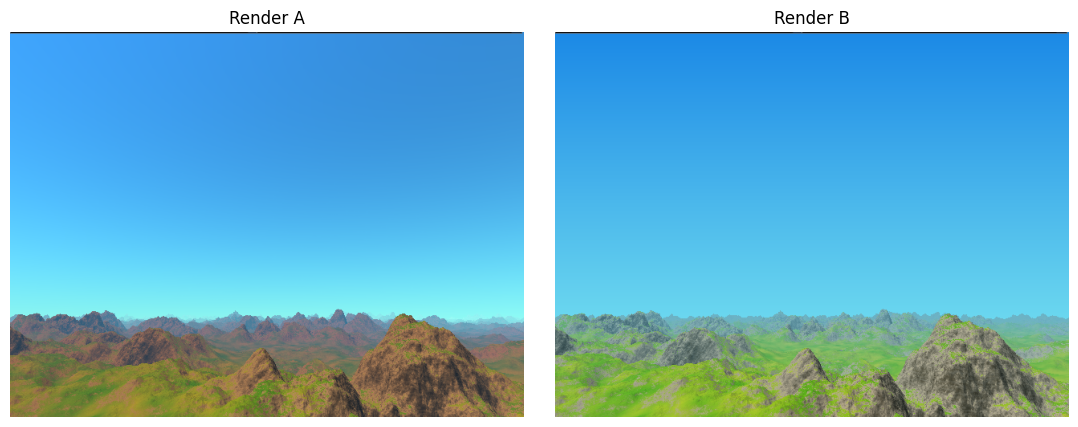

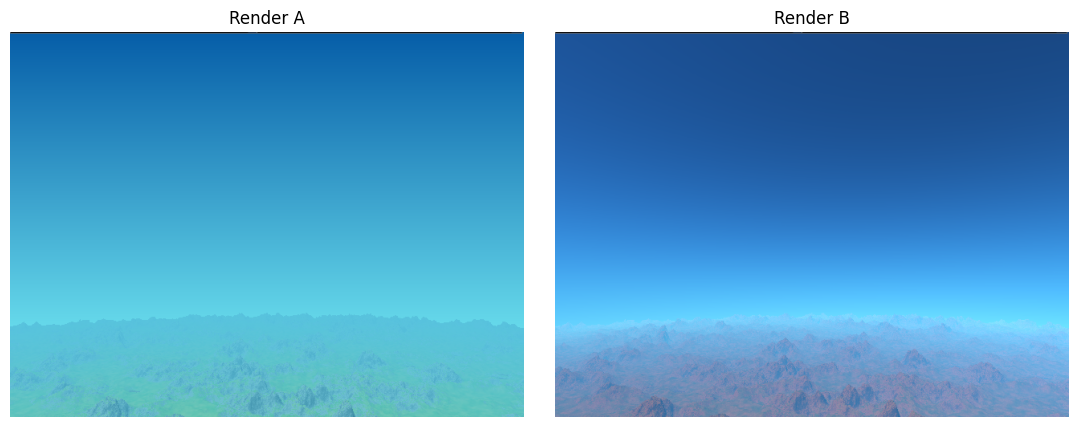

In [260]:
display_and_save_images(pairs, folder + "Pairs")